### `Import Necessary modules`

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score
from sklearn. metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer

### `Import the data`

In [2]:
data=pd.read_csv('Data/output.csv')

In [3]:
data.head()

,Unnamed: 0,created_at,source,original_text,polarity,subjectivity,lang,favorite_count,retweet_count,original_author,followers_count,friends_count,possibly_sensitive,hashtags,user_mentions,place
0,0,Fri Jun 18 17:55:49 +0000 2021,"<a href=""http://twitter.com/download/iphone"" r...","🚨Africa is ""in the midst of a full-blown third...",0.166667,0.188889,en,548,612,ketuesriche,551,351,None,NaN,TelGlobalHealth\nWHOAFRO,Mass
1,1,Fri Jun 18 17:55:59 +0000 2021,"<a href=""https://mobile.twitter.com"" rel=""nofo...","Dr Moeti is head of WHO in Africa, and one of ...",0.133333,0.455556,en,195,92,Grid1949,66,92,None,NaN,globalhlthtwit,"Edinburgh, Scotland"
2,2,Fri Jun 18 17:56:07 +0000 2021,"<a href=""http://twitter.com/download/iphone"" r...",Thank you @research2note for creating this ama...,0.316667,0.483333,en,2,1,LeeTomlinson8,1195,1176,None,red4research,NHSRDForum\nResearch2note\nNHSRDForum,NaN
3,3,Fri Jun 18 17:56:10 +0000 2021,"<a href=""https://mobile.twitter.com"" rel=""nofo...","Former Pfizer VP and Virologist, Dr. Michael Y...",0.086111,0.197222,en,1580,899,RIPNY08,2666,2704,None,NaN,HighWireTalk,NaN
4,4,Fri Jun 18 17:56:20 +0000 2021,"<a href=""http://twitter.com/download/android"" ...",I think it’s important that we don’t sell COVA...,0.280000,0.620000,en,72,20,pash22,28250,30819,None,NaN,PeterHotez,United Kingdom


In [4]:
cleanTweet=data[['original_text','polarity']].rename({'original_text':'clean-text'},axis=1)

In [5]:
cleanTweet.head()

,clean-text,polarity
0,"🚨Africa is ""in the midst of a full-blown third...",0.166667
1,"Dr Moeti is head of WHO in Africa, and one of ...",0.133333
2,Thank you @research2note for creating this ama...,0.316667
3,"Former Pfizer VP and Virologist, Dr. Michael Y...",0.086111
4,I think it’s important that we don’t sell COVA...,0.280000


In [6]:
def text_category(p):
    if p>0:
        return 'positive'
    elif p<0:
        return 'negative'
    return 'neutral'

In [8]:
cleanTweet['score']=cleanTweet['polarity'].map(text_category)

In [9]:
cleanTweet.head()

,clean-text,polarity,score
0,"🚨Africa is ""in the midst of a full-blown third...",0.166667,positive
1,"Dr Moeti is head of WHO in Africa, and one of ...",0.133333,positive
2,Thank you @research2note for creating this ama...,0.316667,positive
3,"Former Pfizer VP and Virologist, Dr. Michael Y...",0.086111,positive
4,I think it’s important that we don’t sell COVA...,0.280000,positive


### `Visualize score`

<AxesSubplot:xlabel='score'>

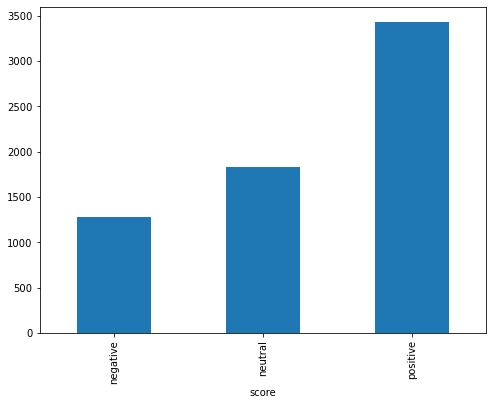

In [10]:
fig,axis=plt.subplots(figsize=(8,6))
cleanTweet.groupby('score')['clean-text'].count().plot.bar(ax=axis)

<AxesSubplot:ylabel='clean-text'>

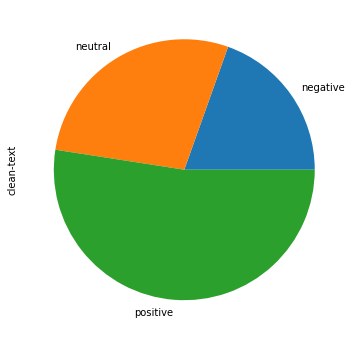

In [11]:
fig,axis=plt.subplots(figsize=(8,6))
cleanTweet.groupby('score')['clean-text'].count().plot.pie(ax=axis)

In [12]:
cleanTweet=cleanTweet[cleanTweet['score']!='neutral']

In [13]:
cleanTweet['scoremap']=cleanTweet['score'].map(lambda x:1 if x=='positive' else 0)

In [14]:
cleanTweet.head()

,clean-text,polarity,score,scoremap
0,"🚨Africa is ""in the midst of a full-blown third...",0.166667,positive,1
1,"Dr Moeti is head of WHO in Africa, and one of ...",0.133333,positive,1
2,Thank you @research2note for creating this ama...,0.316667,positive,1
3,"Former Pfizer VP and Virologist, Dr. Michael Y...",0.086111,positive,1
4,I think it’s important that we don’t sell COVA...,0.280000,positive,1


In [15]:
x=cleanTweet['clean-text']
y=cleanTweet['scoremap']

### `Split the data into train and test`

In [16]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(x,y)

### `Create Pipeline for the model creation` 

In [17]:
pipeline = Pipeline([
    ('vect', CountVectorizer(analyzer='word', ngram_range=(2, 2))),
    ('tfidf', TfidfTransformer()),
    ('clf', SGDClassifier(max_iter=1000)),
])

### `Fit the model`

In [18]:
pipeline.fit(Xtrain,Ytrain)

Pipeline(steps=[('vect', CountVectorizer(ngram_range=(2, 2))),
                ('tfidf', TfidfTransformer()), ('clf', SGDClassifier())])

### `Predict test set`

In [19]:
ypred=pipeline.predict(Xtest)

### `Accuracy`

In [20]:
accuracy_score(ypred,Ytest)

0.9617346938775511

### `Classification Report`

In [21]:
print(classification_report(ypred,Ytest))

              precision    recall  f1-score   support

           0       0.88      0.97      0.93       286
           1       0.99      0.96      0.97       890

    accuracy                           0.96      1176
   macro avg       0.94      0.97      0.95      1176
weighted avg       0.96      0.96      0.96      1176



### `Confusion Matrix`

In [22]:
print(confusion_matrix(ypred,Ytest))

[[278   8]
 [ 37 853]]
